In [2]:
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import fastf1 as ff1
from matplotlib import colors

In [3]:
year=2022
wknd=6
ses='R'
driver='HAM'
colormap=plt.cm.plasma

In [4]:
session = ff1.get_session(year,wknd,ses)
session.load()
weeknd = session.event

req         WARNING 	DEFAULT CACHE ENABLED! (908.42 MB) C:\Users\odath\AppData\Local\Temp\fastf1


core           INFO 	Loading data for Spanish Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '63', '55', '44', '77', '31', '4', '14', '22', '5', '3', '10', '47', '18', '6', '20', '23', '24', '16']


In [5]:
lap = session.laps.pick_drivers(driver).pick_fastest()

In [6]:
telemetry = lap.get_telemetry()
x = telemetry['X']
y = telemetry['Y']
points = np.array([x,y]).T.reshape(-1,1,2)
segments = np.concatenate([points[:-1],points[1:]],axis=1)

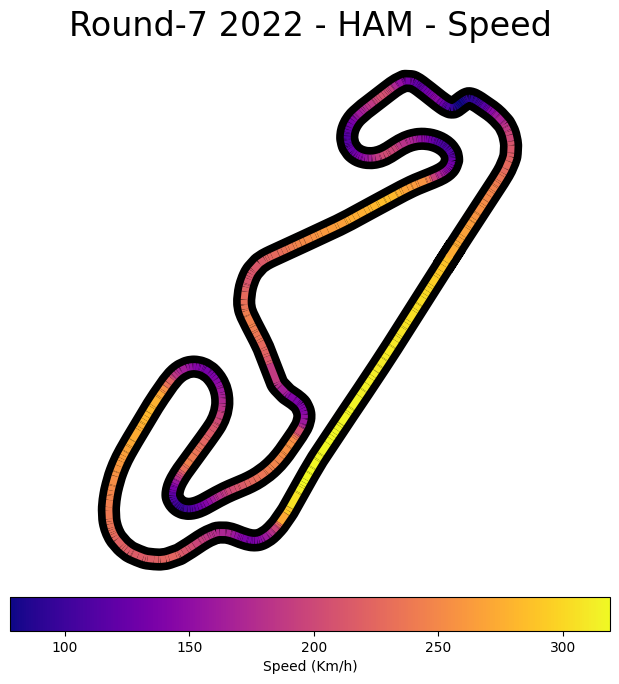

In [7]:
fig, ax = plt.subplots(figsize=(12,6.75))
fig.suptitle(f'Round-{weeknd.name} {year} - {driver} - Speed',size=24,y=0.97)

ax.plot(x,y, color='black', linestyle='-', linewidth=16, zorder=0)

norm = plt.Normalize(telemetry['Speed'].min(),telemetry['Speed'].max())
lc = LineCollection(segments,norm=norm, cmap=colormap, linestyle='-', linewidth=5)
lc.set_array(telemetry['Speed'])
ax.add_collection(lc)

cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend=mpl.colors.Normalize(vmin=telemetry['Speed'].min(), vmax = telemetry['Speed'].max())
mpl.colorbar.ColorbarBase(cbaxes, cmap=colormap, norm=normlegend, orientation='horizontal', label="Speed (Km/h)")

ax.set_aspect('equal', adjustable='box')
ax.axis('off')
plt.subplots_adjust(left=0.1,right=0.9,top=0.9,bottom=0.12)